# Check which window_size, alpha parameters tend to give best R^2

In [1]:
library(CpGWAS)

In [2]:
# Assume scaff_paths is already defined and contains full paths to the files
scaff_paths <- list.files("../output/", pattern = "rds", full.names = TRUE)

# Define a simplified function to extract date and time directly into the data frame creation step
extract_info <- function(path) {
  # Extract date and time based on the filename pattern
  matches <- regmatches(path, regexpr("\\d{8}-\\d{6}", path))
  if (length(matches) > 0) {
    datetime <- strsplit(matches, "-")[[1]]
    date <- paste(substr(datetime[1], 1, 4), substr(datetime[1], 5, 6), substr(datetime[1], 7, 8), sep="-")
    time <- paste(substr(datetime[2], 1, 2), substr(datetime[2], 3, 4), substr(datetime[2], 5, 6), sep=":")
    return(c(date, time))
  } else {
    return(c(NA, NA)) # Provide a fallback in case of no match
  }
}

# Create the data frame by applying the function and combining the results
data_frame <- do.call(rbind, lapply(scaff_paths, function(path) {
  info <- extract_info(path)
  data.frame(path = path, date = info[1], time = info[2], stringsAsFactors = FALSE)
}))

# Sort the data frame by date and then by time
sorted_data_frame <- data_frame[order(data_frame$date, data_frame$time), ]

# Print the first few rows of the sorted data frame to check
head(sorted_data_frame)


,path,date,time
,<chr>,<chr>,<chr>
5,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240131-122515.rds,2024-01-31,12:25:15
7,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-allcorepera-20240131-122517.rds,2024-01-31,12:25:17
8,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-8corestotal-allcorepera-20240131-122518.rds,2024-01-31,12:25:18
1,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519.rds,2024-01-31,12:25:19
3,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-allcorepera-20240131-122521.rds,2024-01-31,12:25:21
4,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-8corestotal-allcorepera-20240131-122522.rds,2024-01-31,12:25:22


In [3]:
sorted_data_frame

,path,date,time
,<chr>,<chr>,<chr>
5,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240131-122515.rds,2024-01-31,12:25:15
7,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-allcorepera-20240131-122517.rds,2024-01-31,12:25:17
8,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-8corestotal-allcorepera-20240131-122518.rds,2024-01-31,12:25:18
1,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519.rds,2024-01-31,12:25:19
3,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-allcorepera-20240131-122521.rds,2024-01-31,12:25:21
4,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-8corestotal-allcorepera-20240131-122522.rds,2024-01-31,12:25:22
6,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240201-121736.rds,2024-02-01,12:17:36
2,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240201-121737.rds,2024-02-01,12:17:37
9,../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1001000-1001999-static-1corestotal-1corepera-20240201-164244.rds,2024-02-01,16:42:44


In [4]:
scaff_paths <- sorted_data_frame$path[34:35]

In [5]:
scaff_paths

[1] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1010000-1010999-dynamic-1corestotal-1corepera-20240205-165816.rds"
[2] "../output//libd_chr1-chr1_AA-libd_chr1-chr1_AA-1011000-1011999-dynamic-1corestotal-1corepera-20240205-165817.rds"

In [6]:
convertToDataFrame <- function(object) {
  if (!inherits(object, "MethylationScaff")) {
    stop("The object must be of class 'MethylationScaff'.")
  }

  modelsList <- lapply(object@models, function(model) {
    data.frame(
      scaffoldIdentifier = object@scaffoldIdentifier,  # Scaffold identifier is the same for all models
      methylationPosition = model@methylationPosition,
      windowSize = model@windowSize,
      nSNPs = model@n_SNPs,
      cor = model@evaluation_results['cor'],
      mse = model@evaluation_results['mse'],
      alpha = model@alpha,
      lambda = model@lambda
    )
  })

  do.call("rbind", modelsList)
}

In [7]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
df <- data.frame()

In [9]:
for(scaff_path in scaff_paths){
    my_scaff <- readRDS(scaff_path)
    small_df <- convertToDataFrame(my_scaff)
    df <- bind_rows(df, small_df)
}

In [10]:
dim(df)

[1] 16975     8

In [11]:
length(levels(factor(df$methylationPosition)))

[1] 2000

In [12]:
dim(df)[1]/(8*5)

[1] 424.375

What percentage of models have all coefficients dropped during regularization?

In [13]:
sum(is.na(df$cor))/dim(df)[1]

[1] 0.5579971

What if we limit to the best model for each positions?

## Which alpha, window_size tend to give most `NA`?

We get `NA` values for cor when all SNPs are dropped during regularization.

In [14]:
library(dplyr)
library(ggplot2)

# For alpha
na_percentage_alpha <- df %>%
  group_by(alpha) %>%
  summarise(PercentageNA = mean(is.na(cor)) * 100)

# For windowSize
na_percentage_windowSize <- df %>%
  group_by(windowSize) %>%
  summarise(PercentageNA = mean(is.na(cor)) * 100)


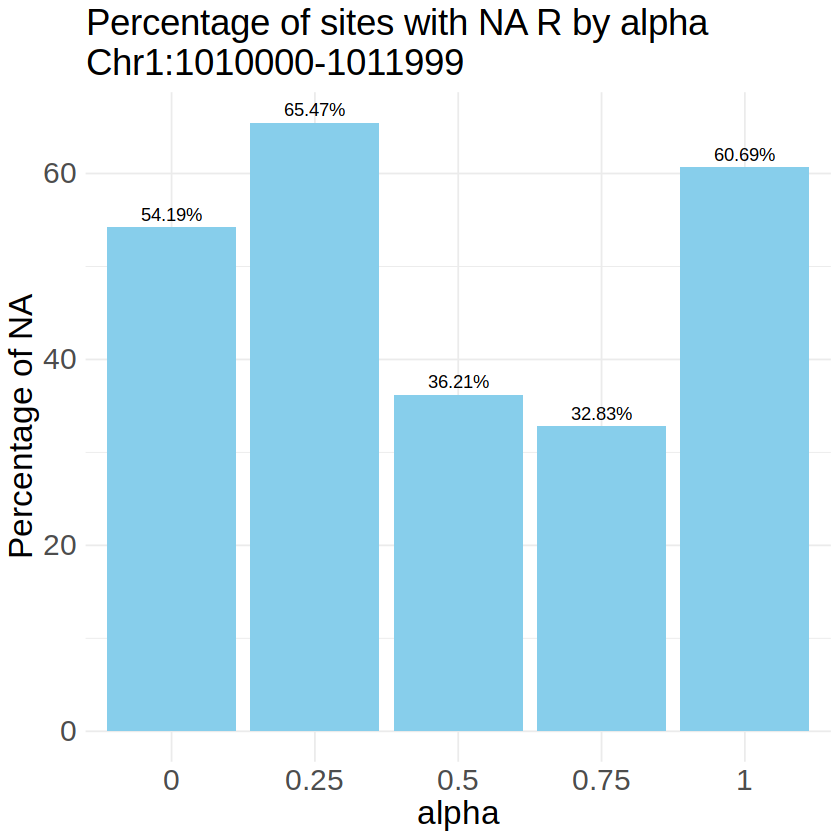

In [15]:
ggplot(na_percentage_alpha, aes(x = as.factor(alpha), y = PercentageNA)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = sprintf("%.2f%%", PercentageNA)), vjust = -0.5) +
  theme_minimal() +
  labs(title = "Percentage of sites with NA R by alpha\nChr1:1010000-1011999", x = "alpha", y = "Percentage of NA") +
  theme(
    text = element_text(size = 20),  # Global text size
    plot.title = element_text(size = 22),  # Title size
    axis.title = element_text(size = 20),  # Axis titles size
    axis.text = element_text(size = 18)  # Axis text size
  )


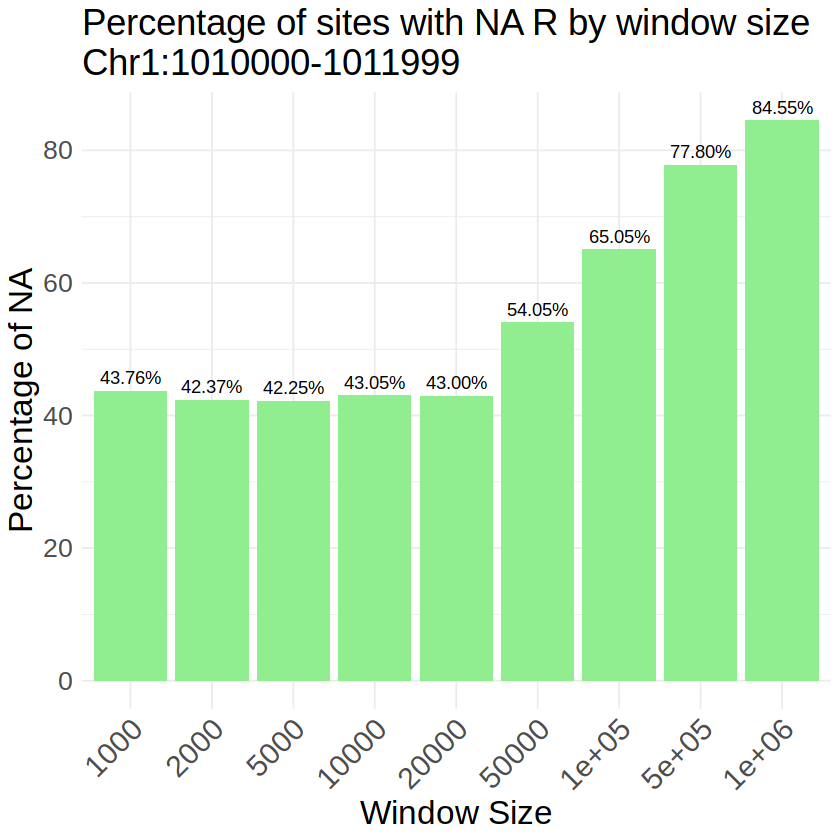

In [16]:
ggplot(na_percentage_windowSize, aes(x = as.factor(windowSize), y = PercentageNA)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  geom_text(aes(label = sprintf("%.2f%%", PercentageNA)), vjust = -0.5) +
  theme_minimal() +
  labs(title = "Percentage of sites with NA R by window size\nChr1:1010000-1011999", x = "Window Size", y = "Percentage of NA") +
  theme(
    text = element_text(size = 20),  # Global text size
    plot.title = element_text(size = 22),  # Title size
    axis.title = element_text(size = 20),  # Axis titles size
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18)  # Rotate x-axis text and adjust size
  )

## See which have best `alpha`, `window_size` tend to give best R^2 (`cor1`)

In [17]:
library(dplyr)

# Assuming your data frame is named df
# filtered_df <- df %>%
#   filter(!is.na(cor)) %>%
#   group_by(methylationPosition) %>%
#   slice(which.max(cor))


In [18]:
filtered_df <- df

Which have NA for all?

In [19]:
na_positions <- df %>%
  group_by(methylationPosition) %>%
  filter(all(is.na(cor))) %>%
  summarise() %>%
  pull(methylationPosition)


In [20]:
length(na_positions)

[1] 164

In [21]:
na_positions_df <- df %>%
  filter(methylationPosition %in% na_positions)


In [22]:
na_positions

[1] 89410422 89421477 89422351 89422712 89422742 89422929 89439488 89444205
  [9] 89444343 89447341 89448681 89449468 89449870 89450147 89450750 89450803
 [17] 89451069 89451171 89451412 89456015 89456033 89456386 89457249 89457501
 [25] 89458469 89459304 89459322 89481754 89481835 89483827 89492318 89492643
 [33] 89492968 89493034 89493613 89504449 89505244 89519039 89519295 89519370
 [41] 89519428 89519438 89519440 89519536 89519643 89519718 89524306 89524379
 [49] 89524396 89524411 89524470 89524489 89524542 89525314 89534657 89537339
 [57] 89537632 89537719 89538707 89538823 89538881 89540063 89540471 89540541
 [65] 89541433 89541437 89541527 89541567 89541583 89541642 89550879 89551018
 [73] 89551054 89551068 89554517 89555207 89555293 89564069 89564221 89565945
 [81] 89576054 89577140 89577434 89577882 89583097 89583130 89583383 89583551
 [89] 89584055 89584127 89584160 89586475 89586693 89588186 89601164 89602804
 [97] 89603339 89604035 89604559 89604705 89605435 89605637 89605752 89610024
[105] 89610059 89610125 89610208 89610213 89610318 89610417 89610467 89610490
[113] 89610494 89610534 89610549 89610601 89610663 89610717 89610757 89610856
[121] 89616405 89616610 89622990 89623460 89623549 89623578 89623670 89623676
[129] 89623962 89630118 89630708 89631694 89631891 89631922 89631937 89631963
[137] 89632043 89636073 89636311 89647662 89651424 89651436 89651524 89652616
[145] 89652780 89653021 89653115 89657613 89659502 89663292 89663296 89663298
[153] 89664672 89667160 89667502 89667822 89668427 89672394 89672542 89672561
[161] 89672686 89672705 89672772 89675370

Warning message:
“Removed 9472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 9472 rows containing missing values (`geom_point()`).”


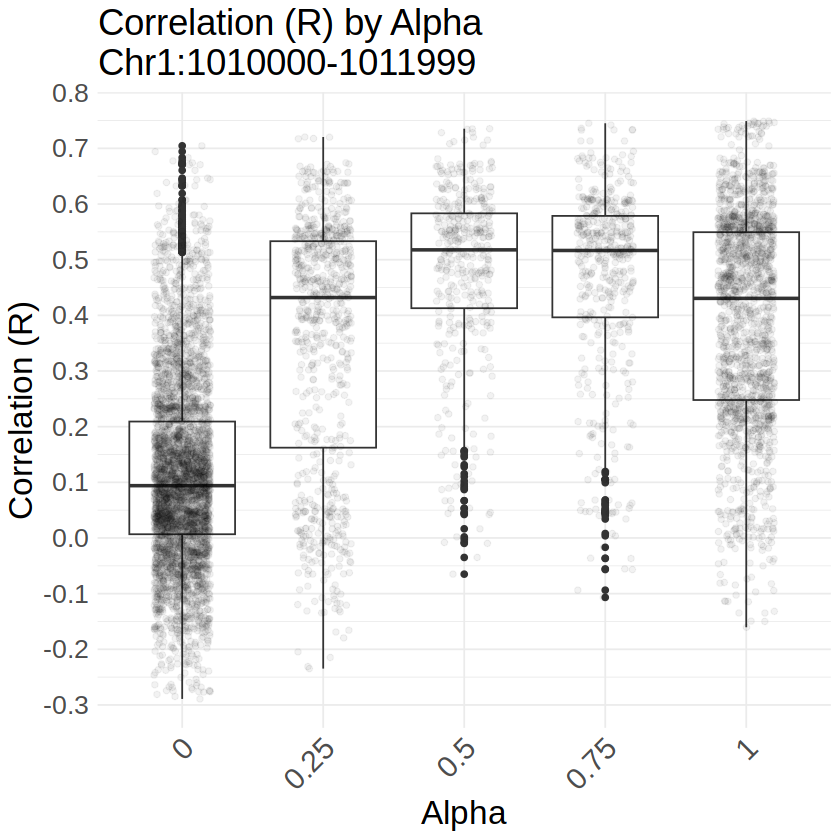

In [23]:
library(ggplot2)

ggplot(filtered_df, aes(x = as.factor(alpha), y = cor)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.05) +
  theme_minimal() +
  labs(title = "Correlation (R) by Alpha\nChr1:1010000-1011999", x = "Alpha", y = "Correlation (R)") +
  scale_y_continuous(breaks = seq(floor(min(filtered_df$cor, na.rm = TRUE)), ceiling(max(filtered_df$cor, na.rm = TRUE)), by = 0.1)) +  # Add y-axis breaks every 0.1
  theme(
    text = element_text(size = 20),  # Global text size
    plot.title = element_text(size = 22),  # Title size
    axis.title = element_text(size = 20),  # Axis titles size
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18)  # Rotate x-axis text and adjust size
  )


Warning message:
“Removed 9472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 9472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 9472 rows containing missing values (`geom_point()`).”


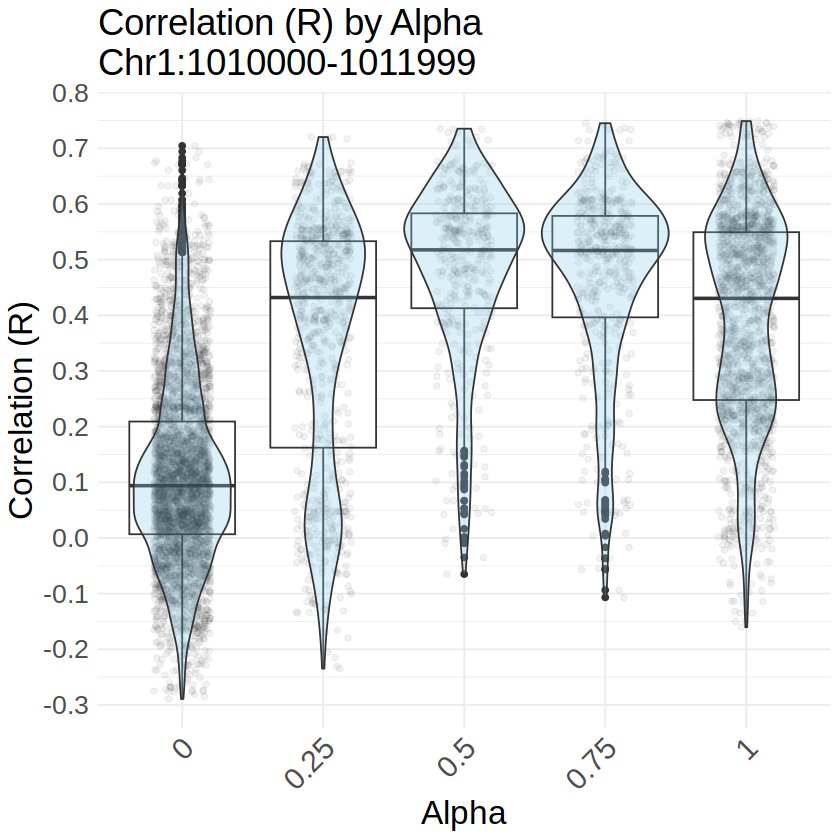

In [24]:
library(ggplot2)

# Base plot with boxplot and jitter
p <- ggplot(filtered_df, aes(x = as.factor(alpha), y = cor)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.05) +
  geom_violin(fill = "skyblue", alpha = 0.3) +  # Add a violin plot for density
  theme_minimal() +
  labs(title = "Correlation (R) by Alpha\nChr1:1010000-1011999", x = "Alpha", y = "Correlation (R)") +
  scale_y_continuous(breaks = seq(floor(min(filtered_df$cor, na.rm = TRUE)), ceiling(max(filtered_df$cor, na.rm = TRUE)), by = 0.1)) +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(size = 22),
    axis.title = element_text(size = 20),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18)
  )

# Print the plot
print(p)


Warning message:
“Removed 9472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 9472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 9472 rows containing missing values (`geom_point()`).”


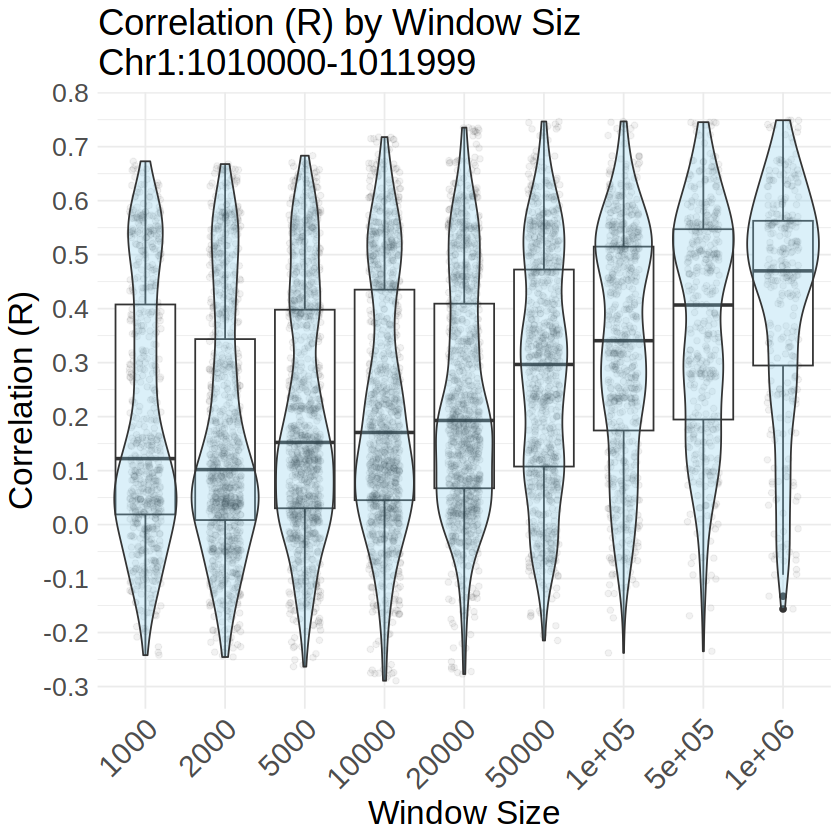

In [25]:
ggplot(filtered_df, aes(x = as.factor(windowSize), y = cor)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.05) +
  theme_minimal() +
  geom_violin(fill = "skyblue", alpha = 0.3) +  # Add a violin plot for density
  labs(title = "Correlation (R) by Window Siz\nChr1:1010000-1011999", x = "Window Size", y = "Correlation (R)") +
  scale_y_continuous(breaks = seq(floor(min(filtered_df$cor, na.rm = TRUE)), ceiling(max(filtered_df$cor, na.rm = TRUE)), by = 0.1)) +  # Add y-axis breaks every 0.1
  theme(
    text = element_text(size = 20),  # Global text size
    plot.title = element_text(size = 22),  # Title size
    axis.title = element_text(size = 20),  # Axis titles size
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18)  # Rotate x-axis text and adjust size
  )

What's highest cor value?

In [26]:
max(na.omit(filtered_df$cor))

[1] 0.748989

How many have this value?

In [27]:
dim(filtered_df[which(filtered_df$cor == max(na.omit(filtered_df$cor))), ])

[1] 1 8

What percentage of non-NA R sites have unique values for R?

In [28]:
length(unique(filtered_df$cor)) / length(na.omit(filtered_df$cor))

[1] 0.9896042

In [29]:
install.packages("plotly")

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Warning message in install.packages("plotly"):
“installation of package ‘lazyeval’ had non-zero exit status”
Warning message in install.packages("plotly"):
“installation of package ‘crosstalk’ had non-zero exit status”
Warning message in install.packages("plotly"):
“installation of package ‘plotly’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [30]:
install.packages("rgl")

Warning message in install.packages("rgl"):
“installation of package ‘rgl’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Warning message:
“Removed 9472 rows containing non-finite values (`stat_density()`).”


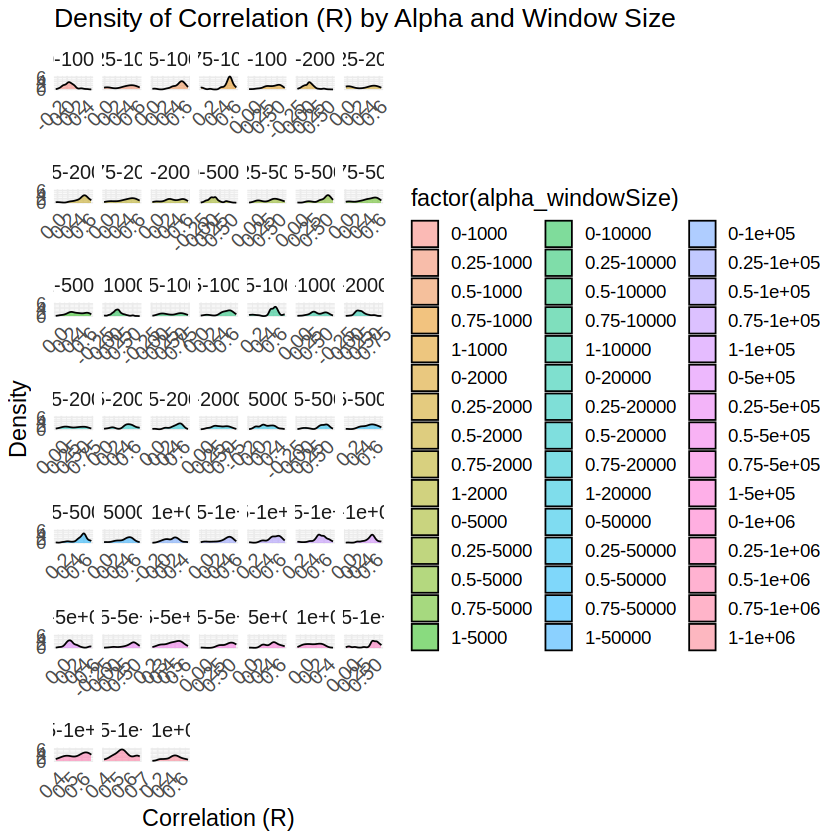

In [31]:
library(ggplot2)

# Assuming filtered_df has 'alpha', 'windowSize', and 'cor' columns
# Create a new interaction factor representing combinations of alpha and windowSize
filtered_df$alpha_windowSize <- interaction(filtered_df$alpha, filtered_df$windowSize, sep = "-")

# Plot
ggplot(filtered_df, aes(x = cor)) +  # Use cor as x since we're doing a density plot
  geom_density(aes(fill = factor(alpha_windowSize)), alpha = 0.5) +  # Density plot for each combination
  facet_wrap(~alpha_windowSize, scales = "free_x") +  # Facet by the new interaction factor
  theme_minimal() +
  labs(title = "Density of Correlation (R) by Alpha and Window Size",
       x = "Correlation (R)", y = "Density") +
  theme(
    text = element_text(size = 14),
    plot.title = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    strip.text.x = element_text(size = 12)  # Adjust facet label size
  )
